In [1]:
import numpy as np
from matplotlib import pyplot as plt

import torch # Libreria
from torch.utils.data import Dataset # Clase u objeto que va a contener la informacion que vamos a utilizar para entrenar y evaluar nuestro algoritmo
from torch.utils.data import DataLoader

<p style='text-align: justify;'>
$e.$ En los puntos (b), (c) y (d) utilizaste Python para hacer la implementación y el modelo ya estaba establecido. En este punto se pide hacer una implementación con Deep Learning en PyTorch.

Las redes neuronales, si tienen la suficiente cantidad de layers y se están utilizando las funciones de activación adecuadas, son capaces de representar cualquier función para mapear la entrada a la salida. Proponer una arquitectura, agregar regularización mediante la técnica dropout, entrenar la red neuronal, buscar los mejores hiper parámetros y presentar el ECM sobre el dataset de testing.
    
Comparar los resultados obtenidos en (e) con los puntos anteriores.
<p>

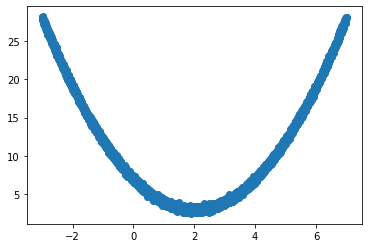

In [2]:
x = np.arange(-3, 7, 0.001)
N = np.random.normal(0, 0.2, 10000)
y = (x-2)**2+3+N
fig, ax = plt.subplots(1,1)
ax.scatter(x, y)

In [3]:
x_train = np.zeros((int(0.8 *len(x)),2))
x_test = np.zeros((int(0.2*len(x)),2))

print(x_train.shape)
print(x_test.shape)

(8000, 2)
(2000, 2)


In [4]:
idx = np.random.permutation(np.arange(0, 10000))

x_train[:,0] = x[idx[0:int(0.8*10000)]]
x_test[:,0] = x[idx[int(0.8*10000):]]

x_train[:,1] = x[idx[0:int(0.8*10000)]]**2
x_test[:,1] = x[idx[int(0.8*10000):]]**2

N_train = N[idx[0:int(0.8*10000)]]
N_test = N[idx[int(0.8*10000):]]

y_train = (x_train[:,0] - 2)**2 + 3 + N_train
y_test = (x_test[:,0] - 2)**2 + 3 + N_test

In [5]:
x_train[0:5,:]

array([[-2.017   ,  4.068289],
       [ 0.369   ,  0.136161],
       [-2.037   ,  4.149369],
       [ 2.448   ,  5.992704],
       [-2.737   ,  7.491169]])

In [6]:
x_train_mean = x_train.mean(axis=0)
x_train_var = x_train.var(axis=0)

x_train_norm = x_train.copy()
x_train_norm = (x_train_norm-x_train_mean)/x_train_var
x_train_norm[:5,:]

array([[-0.48048041, -0.04356392],
       [-0.19468502, -0.06430785],
       [-0.48287602, -0.04313618],
       [ 0.05433787, -0.03341168],
       [-0.56672211, -0.02550653]])

In [7]:
x_test_mean = x_test.mean(axis=0)
x_test_var = x_test.var(axis=0)

x_test_norm = x_test.copy()
x_test_norm = (x_test_norm-x_train_mean)/x_train_var
x_test_norm[:5,:]

array([[-0.12820705, -0.06052207],
       [-0.13659166, -0.06117866],
       [-0.4118464 , -0.05402604],
       [-0.40789365, -0.05452307],
       [ 0.03601151, -0.03723999]])

In [8]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]
  
    def __getitem__(self, idx):
        return self.x[idx,:], self.y[idx]

In [9]:
training_set = CustomDataset(x_train_norm, y_train)

In [10]:
training_set.__len__()

8000

In [11]:
training_set.__getitem__(0)

(array([-0.48048041, -0.04356392]), 19.083464270666134)

In [12]:
test_set = CustomDataset(x_test_norm, y_test)

In [13]:
test_set.__len__()

2000

In [14]:
test_set.__getitem__(0)

(array([-0.12820705, -0.06052207]), 4.193147925342641)

In [15]:
training_dataloader = DataLoader(training_set, batch_size = 512, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size = 256, shuffle=True)

In [16]:
# Definimos el modelo
class NNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features = 2, out_features = 100, bias = True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features = 100, out_features = 500, bias = True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features = 500, out_features = 1000, bias = True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features = 1000, out_features = 800, bias = True)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features = 800, out_features = 200, bias = True)
        self.relu_5 = torch.nn.ReLU()
        self.linear_6 = torch.nn.Linear(in_features = 200, out_features = 1, bias = True)
        
    def forward(self, x):
                                    
        z1 = self.linear_1(x)
        a1 = self.relu_1(z1)
        z2 = self.linear_2(a1)
        a2 = self.relu_2(z2)
        z3 = self.linear_3(a2)
        a3 = self.relu_3(z3)
        z4 = self.linear_4(a3)
        a4 = self.relu_4(z4)
        z5 = self.linear_5(a4)
        a5 = self.relu_5(z5)
        y = self.linear_6(a5)

        return y

In [17]:
nnet = NNet()

In [18]:
print(nnet)

NNet(
  (linear_1): Linear(in_features=2, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=500, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=500, out_features=1000, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=1000, out_features=800, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=800, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=1, bias=True)
)


In [19]:
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(nnet.parameters(), lr=0.005)

In [20]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

print(torch.cuda.is_available())

False


In [21]:
nnet.to(device)

NNet(
  (linear_1): Linear(in_features=2, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=500, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=500, out_features=1000, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=1000, out_features=800, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=800, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=1, bias=True)
)

In [22]:
for epoch in range(100):
    running_loss = 0
    for i, data in enumerate(training_dataloader):
        # data
        x, y = data
        x = x.to(device).float()
        y = y.to(device).float().reshape(-1,1)
        
        # set gradient to zero
        optimizer.zero_grad()

        #forward
        y_hat = nnet(x).reshape(-1,1)

        #loss
        loss = criterion(y_hat, y)

        #backward
        loss.backward()

        #update of parameters
        optimizer.step()

        #compute metrics and statistics
        running_loss += loss.item()
  
    print(f"Epoch = {epoch} - loss = {running_loss / len(training_set)}")

Epoch = 0 - loss = 0.25067694091796877
Epoch = 1 - loss = 0.12332799291610717
Epoch = 2 - loss = 0.09907527685165406
Epoch = 3 - loss = 0.06856340157985687
Epoch = 4 - loss = 0.0483836522102356
Epoch = 5 - loss = 0.03391685727238655
Epoch = 6 - loss = 0.0344059208035469
Epoch = 7 - loss = 0.020378490030765535
Epoch = 8 - loss = 0.03318827441334724
Epoch = 9 - loss = 0.0258798770904541
Epoch = 10 - loss = 0.022968080192804337
Epoch = 11 - loss = 0.02619873470067978
Epoch = 12 - loss = 0.024987679958343507
Epoch = 13 - loss = 0.019017119690775873
Epoch = 14 - loss = 0.020330881983041765
Epoch = 15 - loss = 0.019236495301127435
Epoch = 16 - loss = 0.020435218036174773
Epoch = 17 - loss = 0.020309227526187898
Epoch = 18 - loss = 0.01959406369924545
Epoch = 19 - loss = 0.0173485656529665
Epoch = 20 - loss = 0.018003894597291948
Epoch = 21 - loss = 0.015112878769636155
Epoch = 22 - loss = 0.015599440068006516
Epoch = 23 - loss = 0.0159220587015152
Epoch = 24 - loss = 0.017079672157764434
Epo

In [35]:
x.detach().numpy()[:,0].shape

(320,)

In [27]:
nnet(x).detach().numpy().shape

(320, 1)

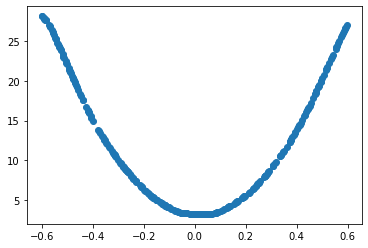

In [38]:
fig, ax = plt.subplots(1,1)
ax.scatter(x.detach().numpy()[:,0], nnet(x).detach().numpy())

In [ ]:
test_dataloader

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

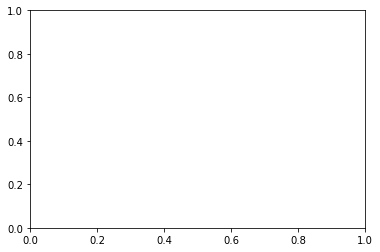

In [44]:
fig, ax = plt.subplots(1,1)
ax.scatter(x_test, nnet(x_test).detach().numpy())

<p style='text-align: justify;'>
$f.$ Para el punto (e), ¿qué función de activación seleccionaste y por qué? Para la función que hayas seleccionado, explica sus características, su forward y su backward.
<p>